In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [119]:
df = pd.read_csv('placement.csv')

In [120]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

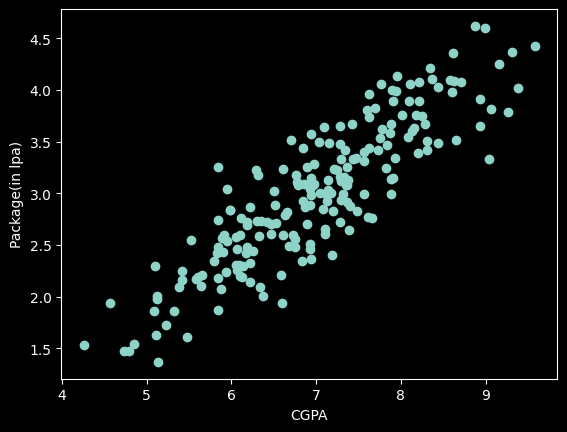

In [121]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [122]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [123]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lr = LinearRegression()

In [127]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

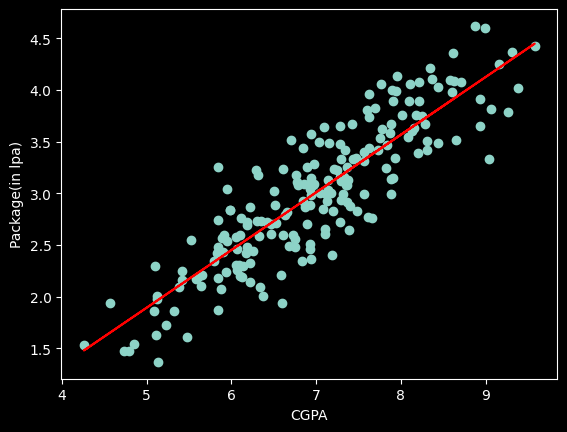

In [128]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [130]:
y_pred = lr.predict(X_test)

In [131]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [132]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [133]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [134]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [135]:
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.780730147510384


In [136]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [137]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.8155012835900071

In [138]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.279481,3.26
1,5.12,0.994991,1.98
2,7.82,0.683884,3.25
3,7.42,0.893483,3.67
4,6.94,0.834583,3.57


Text(0, 0.5, 'Package(in lpa)')

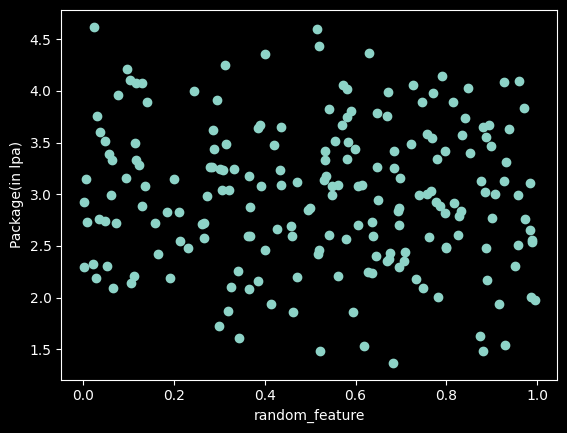

In [139]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [140]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [142]:
lr = LinearRegression()

In [143]:
lr.fit(X_train,y_train)

LinearRegression()

In [144]:
y_pred = lr.predict(X_test)

In [145]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7856858902393933


In [146]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.774101343765847

In [147]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [148]:
new_df2.sample(5)

,cgpa,iq,package
117,7.12,2.39,2.99
13,6.93,3.79,2.89
7,6.75,3.18,2.48
41,6.89,1.70,2.70
33,6.35,2.13,2.73


Text(0, 0.5, 'Package(in lpa)')

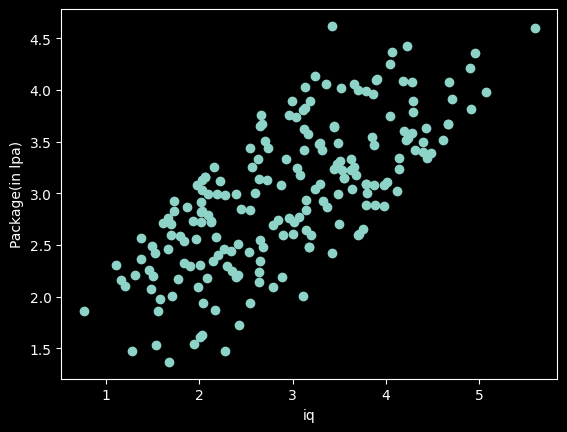

In [149]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [150]:
np.random.randint(-100,100)

41

In [151]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [153]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [154]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8289693165736493


In [155]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8197244147668195